# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)

In [3]:
pop = df['population']
log_pop = df['log_pop']
pop_star = df['pop_star']
log_pop_star = df['log_pop_star']

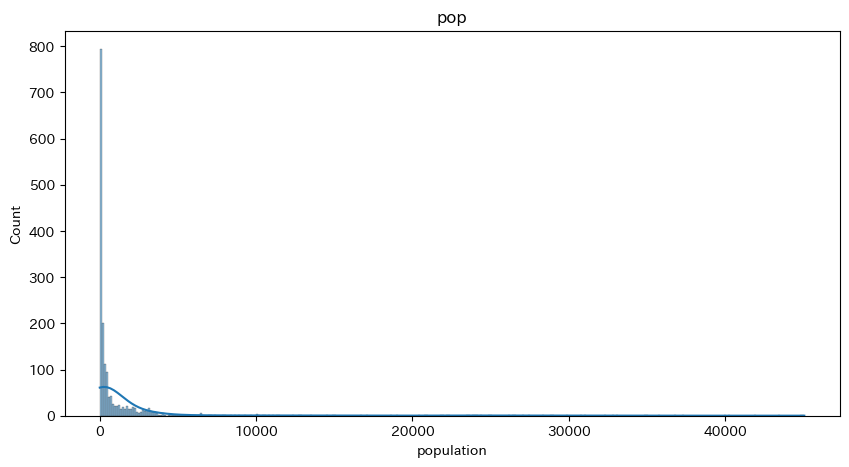

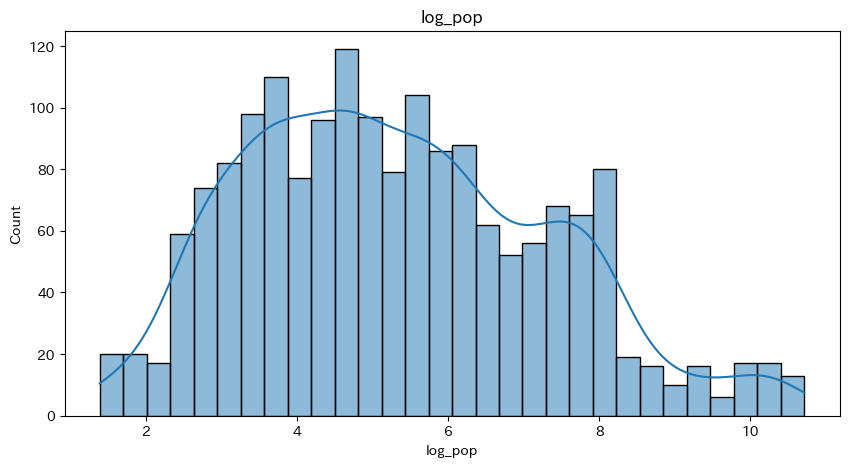

In [10]:
plt.figure(figsize=(10, 5))

sns.histplot(pop, kde=True)
plt.title('pop')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop, kde=True, bins=30)
plt.title('log_pop')
plt.show()

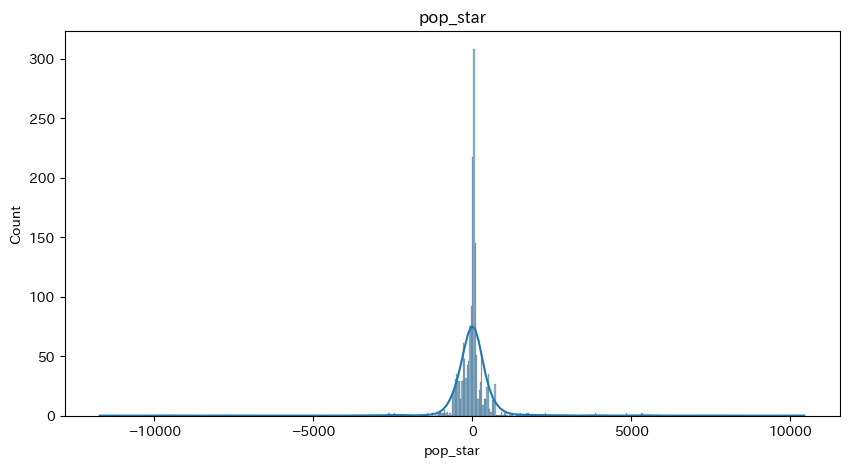

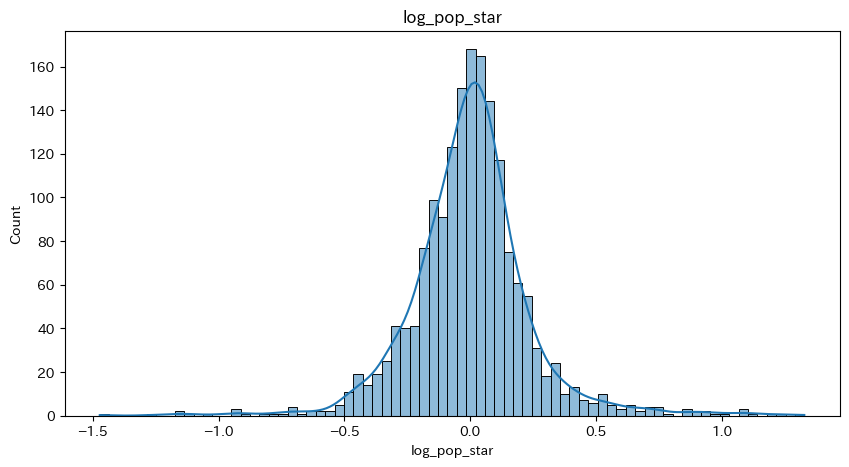

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(pop_star, kde=True)
plt.title('pop_star')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop_star, kde=True)
plt.title('log_pop_star')
plt.show()

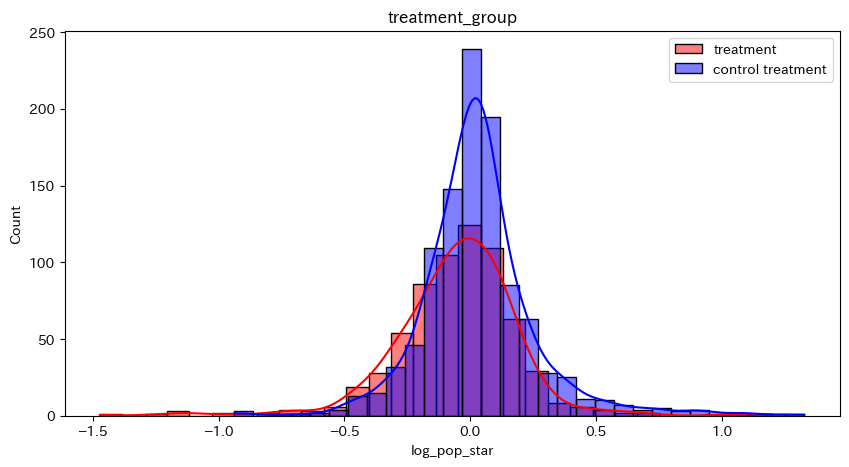

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['treatment_group'] == 1], bins=30, kde=True, color='red', label='treatment')
sns.histplot(df['log_pop_star'][df['treatment_group'] == 0], bins=30, kde=True, color='blue', label='control treatment')
plt.title('treatment_group')
plt.legend()
plt.show()

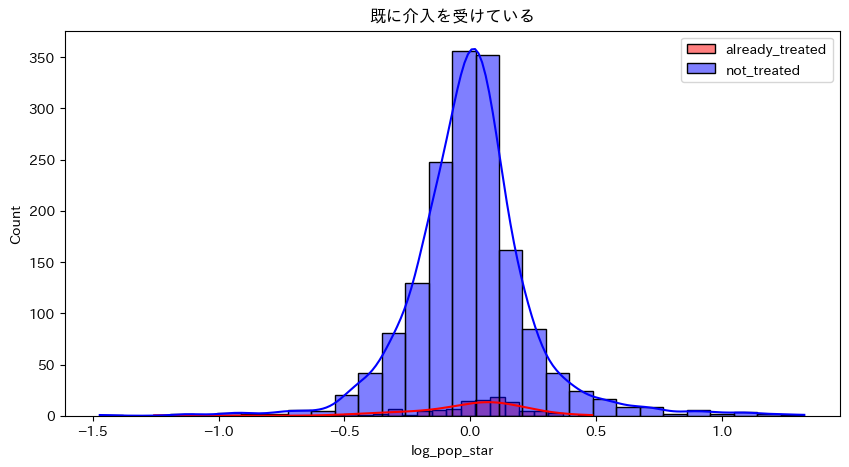

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 1], bins=30, kde=True, color='red', label='already_treated')
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 0], bins=30, kde=True, color='blue', label='not_treated')
plt.title('既に介入を受けている')
plt.legend()
plt.show()

## 推移

/tmp/ipykernel_21454/2383172923.py:2: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])


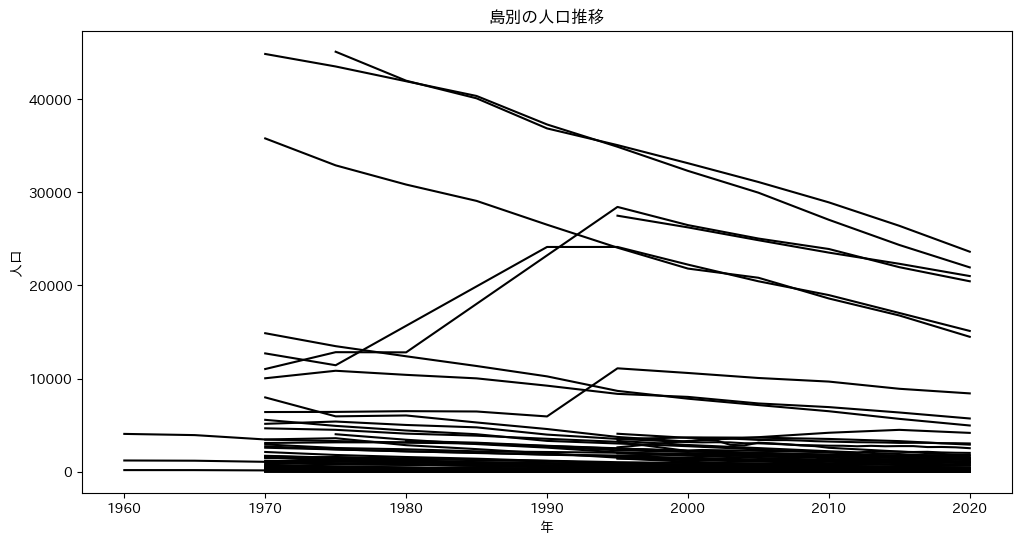

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])
plt.title('島別の人口推移')
plt.ylabel('人口')
plt.xlabel('年')
plt.legend().remove()
plt.show()

## 島別の分散

Text(0.5, 1.0, '島別人口 (固定効果排除済み) の標準偏差')

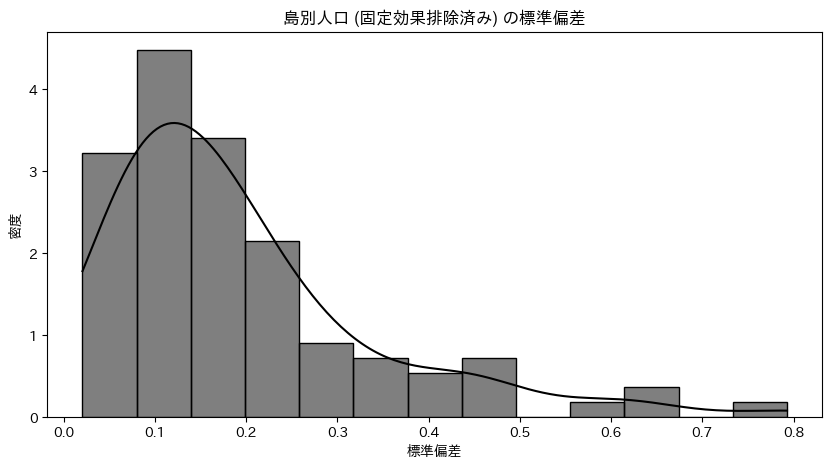

In [21]:
sigma_i = df.groupby('island_ids')['log_pop_star'].std()

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(
    sigma_i,
    # bins=30,
    color='black',
    stat='density',
    kde=True,
    ax=ax
)
ax.set_xlabel('標準偏差')
ax.set_ylabel('密度')
ax.set_title('島別人口 (固定効果排除済み) の標準偏差')